In [4]:
using InvariantMeasures, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


In [5]:
T(x) = 3.3*x*(1-x)
ϕ(x::T) where {T} = abs(x)<1 ? exp(-1/(1-x^2)) : T(0)
ρ(x) = ϕ(x)/0.443994
τ(x, ξ) = (1/ξ)*ρ(x/ξ)

τ (generic function with 1 method)

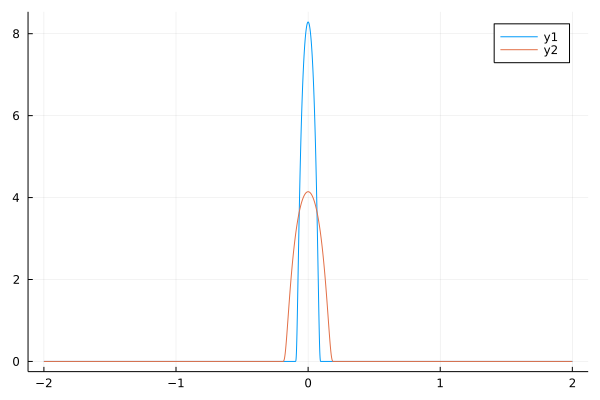

In [6]:
plot(x->τ(x, 0.1), -2, 2)
plot!(x->τ(x, 0.2), -2, 2)

In [ ]:
B = InvariantMeasures.Fourier1D(256, 1024)
Q = DiscretizedOperator(B, T)
P = Q.L

using IntervalArithmetic
Pmid = mid.(real(P))+im*mid.(imag(P))
using Pseudospectra, Plots
spectralportrait(Pmid)
savefig("specportraitnonoise.png")
eigen(Pmid)

function circleshape()
    θ = LinRange(0, 2*π, 500)
    return sin.(θ), cos.(θ)
end

using LinearAlgebra
val = eigen(Pmid).values
plt = scatter(val)
plt = plot!(circleshape(), fillalpha = 0.2)
savefig(plt, "eigenportraitnonoise.png")
